### Problem Part D: Raven (Shady Centroids)

As for Raven, Slade is trying to put reverse psychology to ‘trick’ her. 

Raven is suddenly waking up at Teen Titans HQ, and she is stuck in a circular room with 5 doors. Only one of them is the proper exit, the other is a room full of lasers, trap doors, and other dangerous things. 

Apply a centroid clustering algorithm to help Raven escape. 

Hint: See the Iris flower dataset clustering solution:

https://www.kaggle.com/khotijahs1/k-means-clustering-of-iris-dataset

In [22]:
# We will first begin by creating a dataframe with 5 elements. 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Sample 5 x 1 array of the doors, similar setup to the Cyborg Problem Part B, except this time around, it is with randomly
# generated numbers and not fixed values. 

doors = [[100],[98],[42],[77],[101]]

# Convert it into a single array. 
doors_convert = [element for sublist in doors for element in sublist]
# Convert to an np array here. 

doors_np = np.array(doors_convert)
print(doors_np)

[100  98  42  77 101]


In [25]:
# Convert to data frame. 
doors_np_pd = pd.DataFrame(doors_np)
doors_np_pd 

,0
0,100
1,98
2,42
3,77
4,101


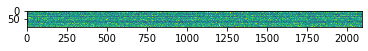

In [26]:
# Second PCA, given data.
# We are given 5 features, for 5 doors. 
features = ['Door 1','Door 2','Door 3','Door 4','Door 5']
n_samples  = 100
n_features = sum(doors_np) * len(features)

# Prep
truth = np.empty(n_samples)
data  = np.empty((n_samples, n_features))
np.random.seed(42)

# Generate
for i,mu in enumerate(np.random.choice([0,1,2,3], n_samples, replace=True)):
    truth[i]  = mu
    data[i,:] = np.random.normal(loc=mu, scale=1.5, size=n_features)

# Show
plt.imshow(data, interpolation='none')
plt.show()

[[92.66666667 92.33333333]
 [98.         42.        ]
 [42.         55.        ]]


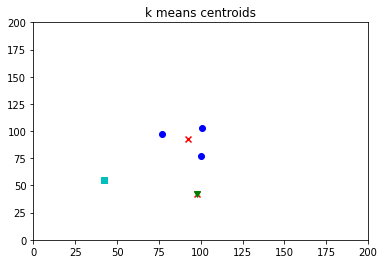

In [27]:
# Scatter plot, but this time around with centroids pointed out. 
# Source: https://pythonprogramminglanguage.com/kmeans-clustering-centroid/

# Permutation of possible door numbers. 
x1 = np.array([100,98,42,77,101])
# Another set of possible door numbers. 
x2 = np.array([77,42,55,97,103])

# create new plot and data
plt.plot()
randomBars = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']

# KMeans algorithm 
K = 3
kmeans_model = KMeans(n_clusters=K).fit(randomBars)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 200])
    plt.ylim([0, 200])

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

So, now we apply some centroid calculation to determine the one door that Raven can choose and 'safely' escape this haunted circular room maze. 

In [28]:
# Source: https://stackoverflow.com/questions/23020659/fastest-way-to-calculate-the-centroid-of-a-set-of-coordinate
# -tuples-in-python-wi

def centroid_calc(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    print(sum_x/length)
    print(sum_y/length)

centroid_calc(randomBars)

83.6
74.8


In [29]:
# We now can determine that the Raven can or cannot escape, by comparing the centroid value to the 'average'
# of the given doors. 

avg_doors = sum(randomBars) / len(randomBars)
print(avg_doors)

[83.6 74.8]


In [30]:
# Since they are the same, this means that Raven can escape from any door range from the given values. 
print("Door range for Raven to escape: ", avg_doors)

Door range for Raven to escape:  [83.6 74.8]


Therefore, Raven can escape the circular maze and she avoids harm by going thru one of the 5 doors that has values labeled in the range between 75 and 83. 